<a href="https://colab.research.google.com/github/Lavan1999/Dataset-23_OyoHotels_NLP/blob/main/OyoHotel_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats

In [3]:
df = pd.read_csv("/content/OYO_HOTEL_ROOMS.csv")
df.dropna(how="any",inplace = True)
df["Discount"] = df["Discount"].apply(lambda x: x.replace("% off", ""))
df.drop(['Hotel_name'], axis=True, inplace = True)
df.drop(columns=['Unnamed: 0'], inplace=True)

In [ ]:
df

,Location,Price,Discount,Rating
0,"India, Mumbai",2819.0,65,104.0
1,"Chembur East, Mumbai",2702.0,65,410.0
2,"Andheri East, Mumbai",2289.0,64,879.0
3,"Andheri East, Mumbai",2094.0,66,75.0
4,"Near Asalpha Metro Station, Dhumai Estate, Mumbai",2656.0,65,686.0
...,...,...,...,...
413,"Dum Dum, Kolkata",815.0,67,74.0
414,"51,Elliot Road Park Street Near Assembly Of Go...",811.0,67,245.0
415,"Poddar Nagar, Kolkata",1441.0,67,260.0
416,"Police Station, Dum Dum, Kolkata",929.0,67,604.0


In [ ]:
len(df.Location.unique())

340

In [ ]:
df.Discount.unique()

array(['65', '64', '66', '67', '75', '77', '68', '70', '69', '85', '72',
       '47', '73', '76', '71', '80', '74', '79', '82', '59', '86', '61',
       '57'], dtype=object)

In [ ]:
df.duplicated().sum()

16

In [4]:
df.drop_duplicates()

,Location,Price,Discount,Rating
0,"India, Mumbai",2819.0,65,104.0
1,"Chembur East, Mumbai",2702.0,65,410.0
2,"Andheri East, Mumbai",2289.0,64,879.0
3,"Andheri East, Mumbai",2094.0,66,75.0
4,"Near Asalpha Metro Station, Dhumai Estate, Mumbai",2656.0,65,686.0
...,...,...,...,...
413,"Dum Dum, Kolkata",815.0,67,74.0
414,"51,Elliot Road Park Street Near Assembly Of Go...",811.0,67,245.0
415,"Poddar Nagar, Kolkata",1441.0,67,260.0
416,"Police Station, Dum Dum, Kolkata",929.0,67,604.0


# **NLP-Natural Language Processing**

In [5]:
from sklearn.feature_extraction.text import CountVectorizer #this ll convert text into vector form matrix(token counts)

In [6]:
nlp=CountVectorizer(ngram_range=(1,1))
loc = df['Location']
x_train = nlp.fit_transform(loc)
x_train.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
nlp.get_feature_names_out()

# **Mechine Learning**

In [ ]:
from sklearn.svm import SVC

In [ ]:
x = pd.concat([pd.DataFrame(x_train.toarray()), df[['Price', 'Rating']]], axis=1)
x.columns = x.columns.astype(str)
y = df['Discount']
#model=SVC().fit(x,y)

In [ ]:
x

,0,1,2,3,4,5,6,7,8,9,...,684,685,686,687,688,689,690,691,Price,Rating
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2819.0,104.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2702.0,410.0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2289.0,879.0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2094.0,75.0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2656.0,686.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,815.0,74.0
414,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,811.0,245.0
415,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1441.0,260.0
416,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,929.0,604.0


In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Columns: 694 entries, 0 to Rating
dtypes: float64(2), int64(692)
memory usage: 2.2 MB


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
svm_model = SVC()
svm_model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(x_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.5238095238095238
Confusion Matrix:
[[ 0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  1  1  0  0  0  0  0  0  0  0]
 [ 0  0 13  3  0  0  0  0  0  0  0  0]
 [ 0  0  2  9  0  0  0  0  0  0  0  0]
 [ 0  0  0  3  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  3  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  0  0  0  0]]


# **Machine Learning**

In [7]:
x = pd.concat([pd.DataFrame(x_train.toarray()), df[['Price', 'Rating','Discount']]], axis=1)
x.columns = x.columns.astype(str)

In [8]:
from sklearn.cluster import KMeans

In [10]:
wcss = []
for i in range(1,40):
  model=KMeans(i)
  model.fit(x)
  wcss.append(model.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

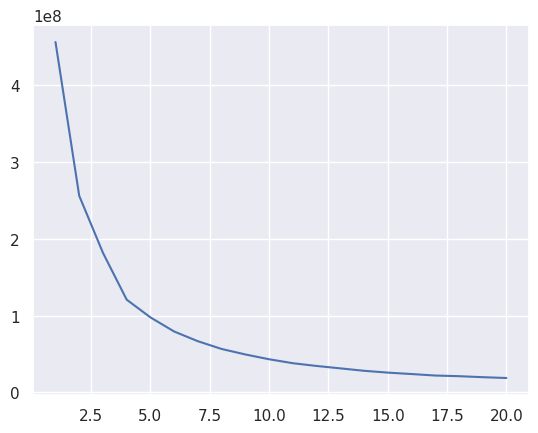

In [11]:
import matplotlib.pyplot as plt
sns.set()
plt.plot(range(1,21),wcss[0:20])
plt.show()


In [13]:
model=KMeans(7)
model.fit(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=7)

In [14]:
identify_cluster=model.fit_predict(x)
identify_cluster

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([5, 5, 3, 5, 5, 5, 3, 3, 3, 3, 5, 5, 5, 5, 5, 5, 0, 5, 5, 5, 1, 1,
       0, 0, 3, 4, 2, 1, 2, 3, 2, 1, 2, 3, 4, 4, 4, 2, 4, 3, 1, 2, 4, 2,
       4, 0, 3, 4, 4, 2, 0, 3, 3, 0, 2, 2, 0, 4, 4, 4, 3, 5, 3, 2, 0, 4,
       2, 0, 4, 4, 0, 4, 0, 0, 2, 2, 0, 3, 3, 2, 4, 4, 2, 2, 0, 2, 0, 5,
       2, 2, 2, 4, 4, 0, 4, 2, 0, 2, 0, 0, 0, 2, 3, 4, 0, 0, 2, 2, 2, 2,
       0, 3, 0, 0, 0, 4, 4, 4, 0, 3, 0, 0, 0, 2, 0, 0, 2, 2, 0, 2, 0, 0,
       4, 5, 0, 0, 5, 0, 5, 5, 0, 0, 5, 0, 0, 5, 2, 0, 0, 5, 5, 0, 3, 0,
       5, 2, 2, 0, 4, 1, 1, 4, 4, 4, 4, 2, 2, 4, 4, 2, 2, 4, 1, 4, 2, 2,
       4, 4, 1, 2, 1, 2, 0, 4, 4, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 4,
       2, 2, 2, 4, 2, 0, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 4, 0, 2,
       2, 2, 5, 4, 4, 1, 2, 0, 4, 2, 0, 2, 0, 5, 0, 2, 2, 2, 2, 0, 2, 4,
       2, 4, 2, 4, 2, 2, 2, 4, 0, 4, 2, 0, 2, 0, 4, 2, 2, 0, 0, 2, 0, 2,
       0, 0, 2, 4, 2, 0, 5, 0, 0, 0, 0, 2, 2, 0, 5, 2, 2, 5, 5, 5, 2, 0,
       2, 0, 0, 0, 2, 2, 2, 1, 2, 0, 2, 1, 2, 2, 2,

In [15]:
x["cluster"]=identify_cluster
x

,0,1,2,3,4,5,6,7,8,9,...,686,687,688,689,690,691,Price,Rating,Discount,cluster
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2819.0,104.0,65,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2702.0,410.0,65,5
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2289.0,879.0,64,3
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2094.0,75.0,66,5
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2656.0,686.0,65,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,815.0,74.0,67,2
414,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,811.0,245.0,67,2
415,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1441.0,260.0,67,0
416,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,929.0,604.0,67,2


In [17]:
x.cluster.value_counts()

cluster
2    139
0    119
4     78
5     39
3     21
1     18
6      4
Name: count, dtype: int64